2025-01-19 16:30:32.106777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737297032.121564   41475 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737297032.125852   41475 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 16:30:32.140720: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU found PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Found 6466 files belonging to 10 classes.
Using 4850 files for training.


I0000 00:00:1737297034.613254   41475 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4816 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Found 6466 files belonging to 10 classes.
Using 1616 files for validation.


2025-01-19 16:30:38.238145: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node sequential/random_rotation/stateful_uniform/Cast_1/_6}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-01-19 16:30:38.238186: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node sequential/random_rotation/stateful_uniform/Cast_1/_6}}]]
	 [[sequential/random_rotation/stateful_uniform/RngReadAndSkip/_8]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-01-19 16:30:38.238199: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7944625090073874497
2025-01-19 16:30:38.238206: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7942973762977822795
2025-01-19 16:30:38.238213: I tensorflow/core/framework/local_rendezvous.cc:424]

Epoch 1/100


/home/adiicmp/GitHub Repos/Python/.venv/lib/python3.12/site-packages/tf_keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1737297042.737529   41527 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-19 16:30:44.183327: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
I0000 00:00:1737297045.936391   41527 service.cc:148] XLA service 0x771ba8c531e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737297045.936411   41527 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1

151/152 [============================>.] - ETA: 0s - loss: 7.4427 - accuracy: 0.2620

2025-01-19 16:31:52.096304: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


152/152 [==============================] - 89s 508ms/step - loss: 7.4419 - accuracy: 0.2623 - val_loss: 7.1018 - val_accuracy: 0.1887
Epoch 2/100
152/152 [==============================] - 74s 477ms/step - loss: 6.6615 - accuracy: 0.3507 - val_loss: 6.6462 - val_accuracy: 0.2946
Epoch 3/100
152/152 [==============================] - 72s 461ms/step - loss: 6.1734 - accuracy: 0.4058 - val_loss: 6.8465 - val_accuracy: 0.2494
Epoch 4/100
152/152 [==============================] - 72s 463ms/step - loss: 5.7983 - accuracy: 0.4351 - val_loss: 6.1903 - val_accuracy: 0.3490
Epoch 5/100
152/152 [==============================] - 73s 467ms/step - loss: 5.4739 - accuracy: 0.4557 - val_loss: 6.6293 - val_accuracy: 0.2191
Epoch 6/100
152/152 [==============================] - 73s 466ms/step - loss: 5.1433 - accuracy: 0.4734 - val_loss: 6.2482 - val_accuracy: 0.2884
Epoch 7/100
152/152 [==============================] - 72s 463ms/step - loss: 4.8273 - accuracy: 0.5056 - val_loss: 6.5143 - val_accurac

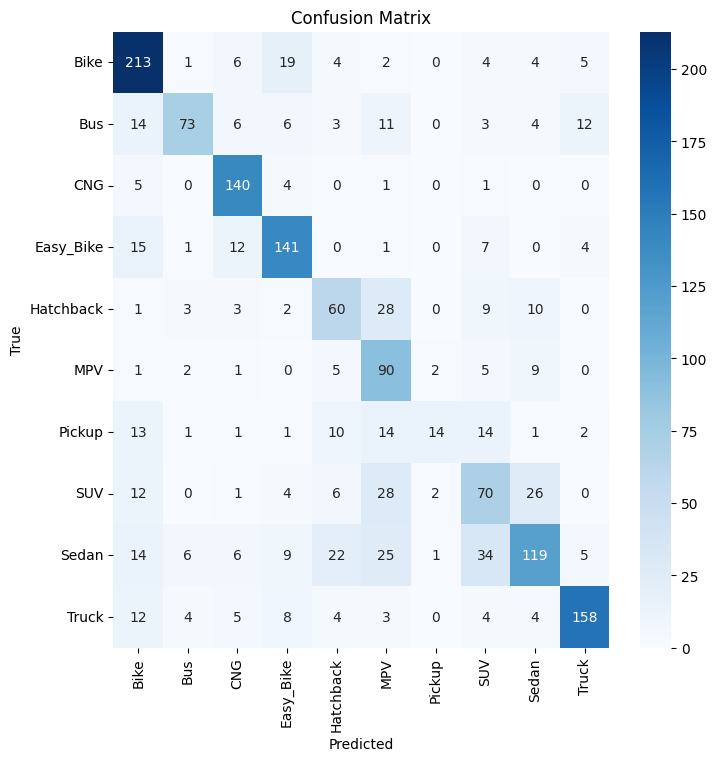

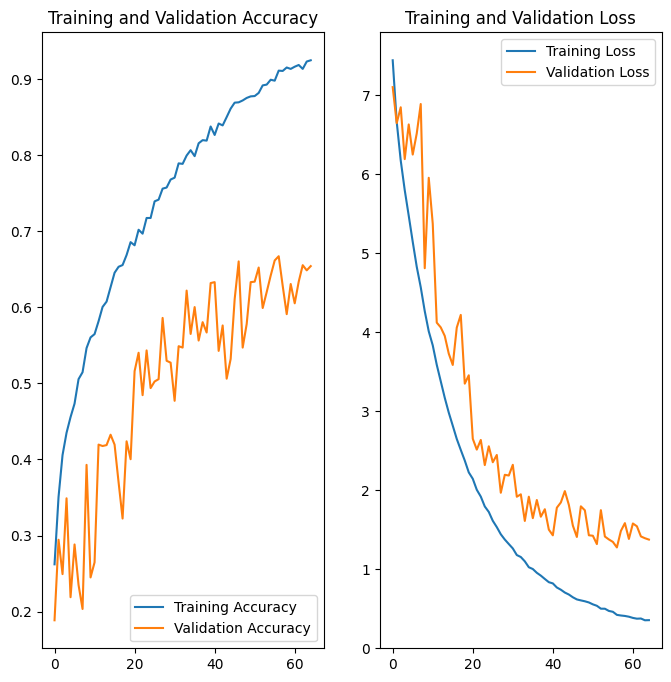

In [ ]:
#%%

import tensorflow as tf
import tf_keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tf_keras import layers
from tf_keras.models import Sequential
from sklearn.metrics import confusion_matrix
from tf_keras.optimizers import Adam
from tf_keras.regularizers import l2

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  tf.config.experimental.set_memory_growth(gpu_devices[0], True)
  print('GPU found', gpu_devices[0])
else:
  print('No GPU found')

#define image size
IMG_SIZE = 224

#define batch size
BATCH_SIZE = 32

#training and valdiation directories
TRAINING_DIR = "Train"
  
#training split
train_ds = tf_keras.utils.image_dataset_from_directory(
  TRAINING_DIR,
  labels = "inferred",
  image_size = (IMG_SIZE, IMG_SIZE),
  batch_size = BATCH_SIZE,
  subset = "training",
  validation_split = 0.25,
  seed = 225
)

#validation split, taken directly from the same directory as train
validation_ds = tf_keras.utils.image_dataset_from_directory(
  TRAINING_DIR,
  labels = "inferred",
  image_size = (IMG_SIZE, IMG_SIZE),
  batch_size = BATCH_SIZE,
  subset = 'validation',
  validation_split = 0.25,
  seed = 225
)

CLASS_NAMES = train_ds.class_names

#data augmentation to increase robustness
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal'),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2) 
])

def augment_images(image, label):
  image = data_augmentation(image)
  return image, label

train_ds = train_ds.map(augment_images)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size = AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size = AUTOTUNE)

#normalizing the data
norm_layer = layers.Rescaling(1./255)
norm_ds = train_ds.map(lambda x, y: (norm_layer(x), y))
image_batch, labels_batch = next(iter(norm_ds))

num_classes = len(CLASS_NAMES)

#training model
model = Sequential([
  layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(128, (3, 3), activation = 'relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(256, (3, 3), activation = 'relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(256, (3, 3), activation = 'relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(512, (3, 3), activation = 'relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(512, (3, 3), activation = 'relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Flatten(),
  layers.Dense(512, activation = 'relu', kernel_regularizer = l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation = 'softmax')
])

model.compile(optimizer = Adam(learning_rate = 0.0001, weight_decay = 1e-6), 
              loss = tf_keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

#no of epochs
epochs = 100


#early stopping
early_stopping = tf_keras.callbacks.EarlyStopping(monitor = 'val_accuracy', 
                                                  mode = 'min', 
                                                  verbose = 1, 
                                                  patience = 8, 
                                                  restore_best_weights = True)


#fitting of the model
history = model.fit(train_ds, 
                    validation_data = validation_ds, 
                    epochs = epochs, 
                    callbacks = [early_stopping])

#accuracy and loss values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

true_labels = []
predicted_labels = []

for images, labels in val_ds:
  true_labels.extend(labels.numpy())
  pred = model.predict(images)
  predicted_labels.extend(np.argmax(pred, axis = 1))

confusion_matrix = confusion_matrix(true_labels, predicted_labels)

print('Confusion Matrix: ')
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', xticklabels = CLASS_NAMES, yticklabels = CLASS_NAMES, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


score = model.evaluate(validation_ds, verbose = 0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()